In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.dpi'] = 150.
plt.rcParams['figure.figsize'] = (3, 3)

# Data

In [4]:
mean = np.array([0., 0.])
cov = np.array([[30., 15.], 
                [15., 10.]])

In [5]:
data = np.random.multivariate_normal(mean, cov, 200)
print(data.shape)

(200, 2)


(-18.764849462135434,
 18.572205732717766,
 -9.23770350157035,
 10.415723626883333)

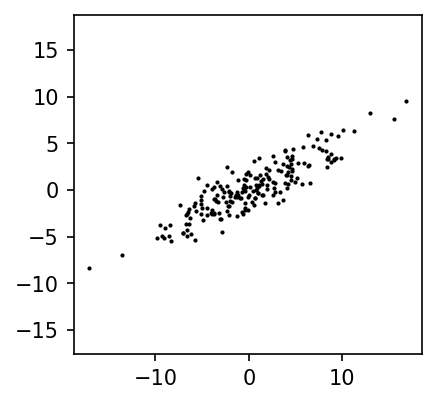

In [6]:
fig, ax = plt.subplots()
ax.scatter(*data.T, s=1, c="k")
ax.axis("equal")

## Mean and variance

Text(0.5, 1.0, 'y')

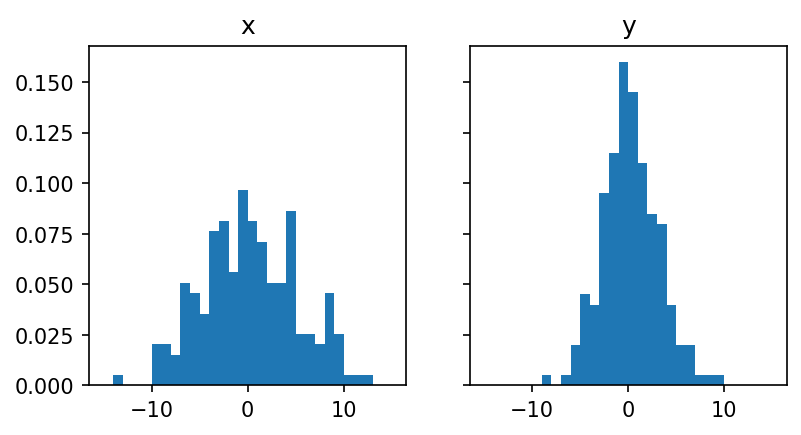

In [7]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 3))
for i, ax in enumerate(axes):
    axes[i].hist(data[:, i], bins=np.arange(-15, 16), density=True);
axes[0].set_title("x")
axes[1].set_title("y")

In [8]:
data_x, data_y = data.T

Variance of x?

In [9]:
np.var(data_x)

27.98398726306258

What does it mean?

Variance is the average square difference between data points and the mean

In [10]:
x_mean = np.mean(data_x)
square_diffs = (data_x - x_mean) ** 2
np.mean(square_diffs)

27.98398726306258

What does it mean geometrically?

## Simple example

In [11]:
xy = np.array([[0.8, 1.2], 
               [-2.0, -1.6], 
               [-0.2, 1.1], 
               [0.4, -0.2], 
               [1.7, 0.9], 
               [-0.7, -1.4]])

In [12]:
x, y = xy.T

(-2.185, 1.885, -1.74, 1.3399999999999999)

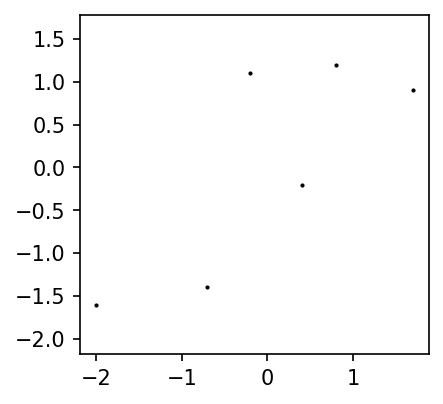

In [13]:
fig, ax = plt.subplots()
ax.scatter(*xy.T, s=1, c="k")
ax.axis("equal")

In [14]:
np.var(x)

1.37

Sanity check

In [15]:
x_mean = np.mean(x)
np.mean((x - x_mean) ** 2)

1.37

Plot x against itself

(-2.185, 1.885, -2.185, 1.885)

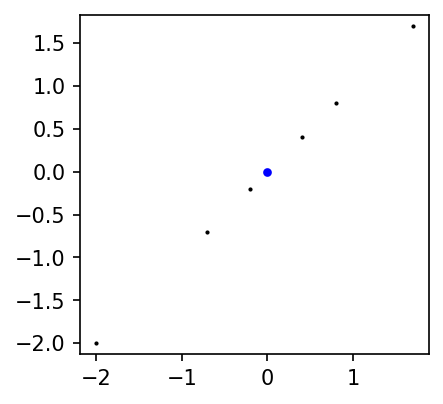

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, x, s=1, c="k")
ax.scatter([x_mean], [x_mean], s=10, c="b")
ax.axis("equal")

(-2.185, 1.885, -2.185, 1.885)

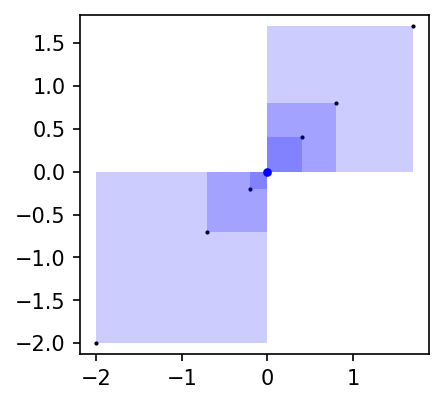

In [17]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150.)
ax.scatter(x, x, s=1, c="k")
ax.scatter([x_mean], [x_mean], s=10, c="b")
for val in x:
    rect = patches.Rectangle((x_mean, x_mean), val, val, linewidth=0, facecolor='b', alpha=0.2)
    ax.add_patch(rect)
ax.axis("equal")

### "Covariance"?

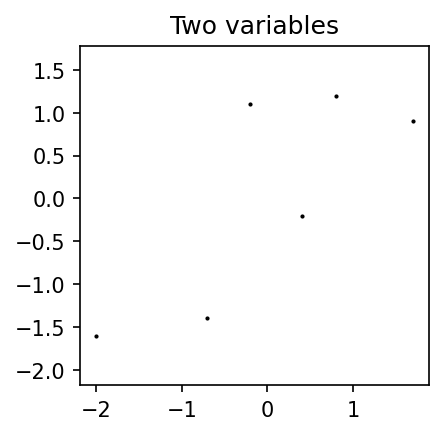

In [18]:
fig, ax = plt.subplots()
ax.scatter(*xy.T, s=1, c="k")
ax.axis("equal")
ax.set_title("Two variables");

Draw rectangles

(-2.185, 1.885, -1.74, 1.3399999999999999)

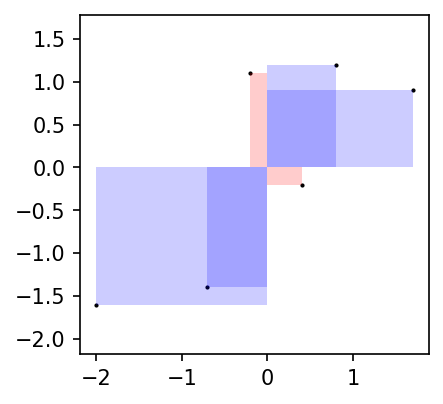

In [19]:
fig, ax = plt.subplots()
ax.scatter(*xy.T, s=1, c="k")
col = {-1: "r", 1: "b"}
for x, y in xy:
    c = col[np.sign(x * y)]
    rect = patches.Rectangle((0, 0), x, y, linewidth=0, facecolor=c, alpha=0.2)
    ax.add_patch(rect)
ax.axis("equal")

In [20]:
x, y = xy.T
xy_mean = xy.mean(axis=0)

In [21]:
xy_cov = np.cov(xy.T, ddof=0)
print(xy_cov)

[[1.37       1.06166667]
 [1.06166667 1.33666667]]


In [22]:
np.var(x), np.var(y)

(1.37, 1.3366666666666667)

Sum area of rectangles?

In [23]:
np.sum(x* y) / len(xy)

1.0616666666666665

# Back to data

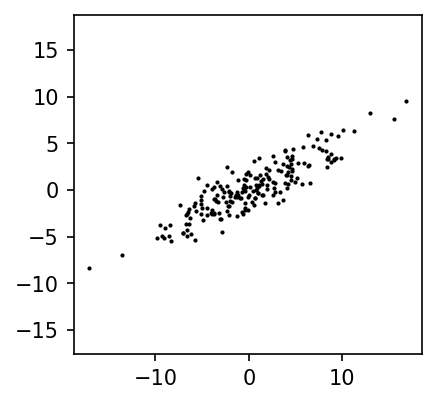

In [24]:
fig, ax = plt.subplots()
ax.scatter(*data.T, s=1, c="k")
ax.axis("equal");

In [25]:
data_cov = np.cov(data.T)
print(data_cov)

[[28.12461031 13.67294274]
 [13.67294274  8.44934546]]


Relatively high covariance of x and y = redundancy in dataset (knowing something about x tells us something about y and vice versa)

Question: can we find a better basis to represent these data?

Lets try some new basis vectors!

In [26]:
ij = np.identity(2)
print(ij)  # this is our current basis

[[1. 0.]
 [0. 1.]]


In [27]:
angles = np.linspace(0, np.pi / 2., 5)

bases = np.array([[np.cos(angles), np.sin(angles)],
                  [-np.sin(angles), np.cos(angles)]])
bases = np.rollaxis(bases, 2)
bases.shape

(5, 2, 2)

Project data onto each new basis

In [28]:
data.shape

(200, 2)

In [29]:
projected = np.einsum("kij,nj->kni", bases, data)
projected.shape

(5, 200, 2)

In [30]:
kwargs = dict(color="r", units="xy", angles="xy", scale_units="xy", scale=1, zorder=2)

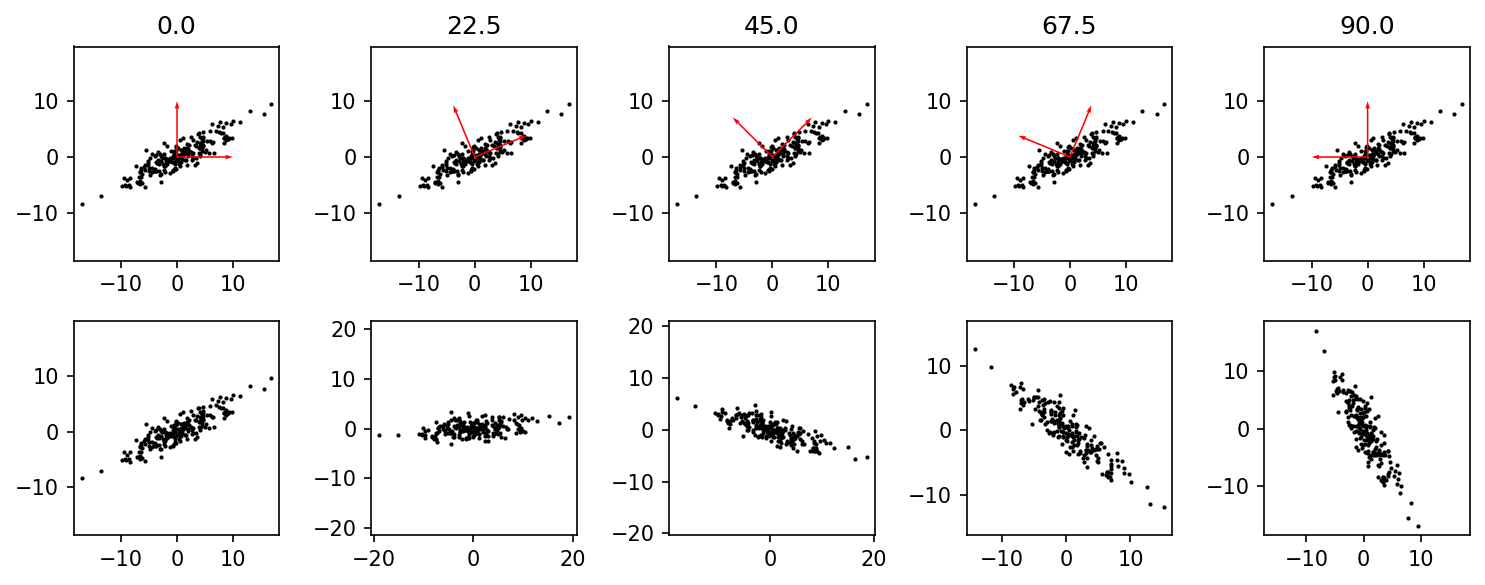

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes[0]):
    ax.scatter(*data.T, s=1, c="k")
    ax.quiver([0, 0], [0, 0], bases[i, :, 0] * 10, bases[i, :, 1] * 10, **kwargs)
    ax.set_title(np.degrees(angles[i]))
    ax.axis("equal")
    
for i, ax in enumerate(axes[1]):
    ax.scatter(*projected[i].T, s=1, c="k")
    ax.axis("equal")
plt.tight_layout()

Lets check out covariance!

In [32]:
new_data = projected[1]

(-20.871576431874306,
 21.144405618148607,
 -3.363630065558162,
 3.6066954946891743)

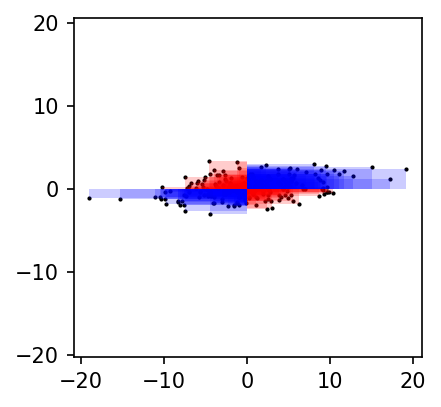

In [33]:
fig, ax = plt.subplots()
ax.scatter(*new_data.T, s=1, c="k")
col = {-1: "r", 1: "b"}
for x, y in new_data:
    c = col[np.sign(x * y)]
    rect = patches.Rectangle((0, 0), x, y, linewidth=0, facecolor=c, alpha=0.2)
    ax.add_patch(rect)
ax.axis("equal")

In [34]:
print("original covariance:\n", data_cov, end="\n\n")
print("new covariance:\n", np.cov(new_data.T))

original covariance:
 [[28.12461031 13.67294274]
 [13.67294274  8.44934546]]

new covariance:
 [[34.91146502  2.71197393]
 [ 2.71197393  1.66249076]]


### Can we do better?

Eigendecomposition of original covariance matrix

In [35]:
w, v = np.linalg.eig(data_cov)
print("Eigenvalues:", w)
print("Eigenvectors:\n", v)

Eigenvalues: [35.13121652  1.44273926]
Eigenvectors:
 [[ 0.88995378 -0.45605074]
 [ 0.45605074  0.88995378]]


(-18.764849462135434,
 18.572205732717766,
 -9.23770350157035,
 10.415723626883333)

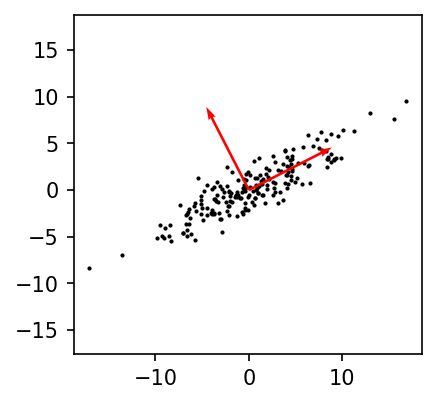

In [36]:
fig, ax = plt.subplots()
ax.scatter(*data.T, s=1, c="k")
ax.quiver([0, 0], [0, 0], v[0] * 10, v[1] * 10, color="r", units="xy", angles="xy", scale_units="xy", scale=1, zorder=2)
ax.axis("equal")

In [37]:
trans = np.dot(data, v)

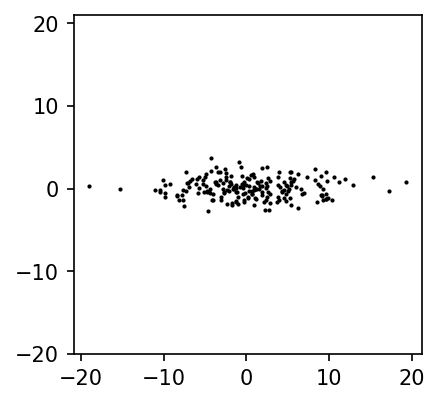

In [38]:
fig, ax = plt.subplots()
ax.scatter(*trans.T, s=1, c="k")
ax.axis("equal");

(-20.912710143786725,
 21.278503078399204,
 -2.995615709008302,
 3.963797749117512)

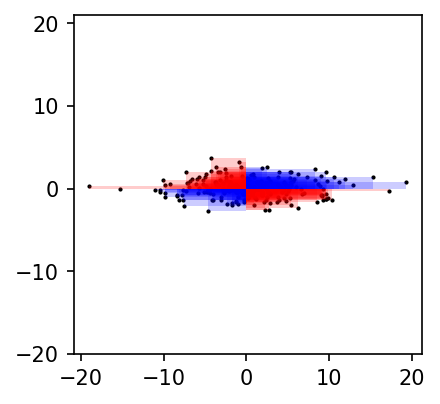

In [39]:
fig, ax = plt.subplots()
ax.scatter(*trans.T, s=1, c="k")
col = {-1: "r", 1: "b"}
for x, y in trans:
    c = col[np.sign(x * y)]
    rect = patches.Rectangle((0, 0), x, y, linewidth=0, facecolor=c, alpha=0.2)
    ax.add_patch(rect)
ax.axis("equal")

In [40]:
new_cov = np.cov(trans.T)
print(np.round(new_cov, 3))

[[35.131 -0.   ]
 [-0.     1.443]]


We have projected our data onto a new orthogonal basis with no covariance between dimensions!

We just did a PCA!

First principal component:

In [43]:
print(v[:, 0])  # "feature vector"

[0.88995378 0.45605074]
